### Simple linear regression
Simple Linear Regression is a statistical method that models the relationship between two variables by fitting a linear equation to observed data. <br>

The linear equation used in simple linear regression has the form:
$$
    y = \beta_0 + \beta_1 x + \epsilon
$$ <br>
Here, 
* $y$ is the dependent variable and $x$ is the independent variable. <br>
* $\beta_0$ and $\beta_1$ are the y-intercept and the slope of the regression line.<br>
* $\epsilon$ is the error term, i.e. the difference between the observed and predicted values by the model.

### 1) Import required packages 

In [266]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams.update({'font.size': 14, 'font.family': 'Palatino'})
%matplotlib inline

### 2) Load Datasets

In [267]:
tv_data = pd.read_csv('TV Marketing.csv')
tv_data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


### 3) Exploring and visualising the data 

In [268]:
# Display information
tv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [269]:
#for some statistical information about the dataframe.
tv_data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [270]:
# Display the first 5 rows
tv_data.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4


In [271]:
# Display the last 5 rows
tv_data.tail(5)

,TV,Sales
194,149.7,17.3
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [272]:
# Check the shape of the DataFrame (rows, columns)
tv_data.shape

(200, 2)

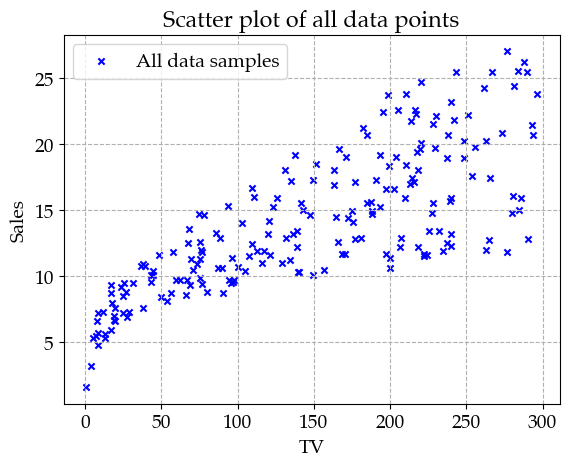

In [273]:
# Visualise the relationship between the features and the response using scatterplots
fig, ax = plt.subplots(nrows=1, ncols=1)
tv_data.plot(x='TV', y='Sales', 
             kind='scatter', ax=ax, 
             marker='x', color='b', label="All data samples")
ax.set_title("Scatter plot of all data points")
plt.legend()
plt.grid(ls='--')

### 4) Model Building

In [274]:
# Forming the supervised training data
X_trn, y_trn = tv_data['TV'], tv_data['Sales']

#### Using gradient descent optimization

In [275]:
def take_gradient_step(current_b, current_m, points, learning_rate):
    gradient_wrt_m = 0.0
    gradient_wrt_b = 0.0
    N = points.shape[0]

    # Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        gradient_wrt_m = gradient_wrt_m - (2 / N) * x * (y - (current_m * x + current_b))
        gradient_wrt_b = gradient_wrt_b - (2 / N) * (y - (current_m * x + current_b))
        
        # print(gradient_wrt_m)

    # Update current m and b
    updated_m = current_m - learning_rate * gradient_wrt_m  # gradient step for parameter: m
    updated_b = current_b - learning_rate * gradient_wrt_b  # gradient step for parameter: b

    # Return updated parameters
    return updated_b, updated_m


def compute_cost(param_b, param_m, points):
    total_cost = 0.0
    N = points.shape[0]

    # Compute sum of squared errors
    for i in range(0, points.shape[0]):
        x = points[i, 0]
        y = points[i, 1]
        total_cost = total_cost + (y - (param_m * x + param_b)) ** 2  # Summing errors due to all data points

    # Return average of squared error
    total_cost = total_cost / N
    return total_cost


def gradient_descent_optim(points, initial_b=2.0, initial_m=1.0, lr=0.00003, num_iters=100000):
    m, b = initial_m, initial_b  # assigning initial parameter values to (b, m)
    cost_values = []  # initializing an empty list "cost_values" for storing the costs at each iteration

    # For every iteration, optimize b, m and compute its cost
    for _ in range(num_iters):
        cost_values.append(compute_cost(b, m, points))
        b, m = take_gradient_step(b, m, np.array(points), lr)

    return [b, m, cost_values]

#### Splitting Data into Training and Testing Sets 

In [276]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trn, y_trn,  test_size=0.3, random_state = 1)
# X_train = X_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)
data = np.vstack([X_train, y_train]).T
data.shape
# data

(140, 2)

#### Gradient descent optimization

In [277]:
# Perform gradient descent optimization
beta_0, beta_1, cost_graph = gradient_descent_optim(data)

# Print optimized parameters
print('Found optimal value of b:', beta_0)
print('Found optimal value of m:', beta_1)

# Print error with optimized parameters
print('Value of the cost function is:', compute_cost(beta_0, beta_1, data))

Found optimal value of b: 5.942667985609139
Found optimal value of m: 0.05314557915266163
Value of the cost function is: 10.750821285903001


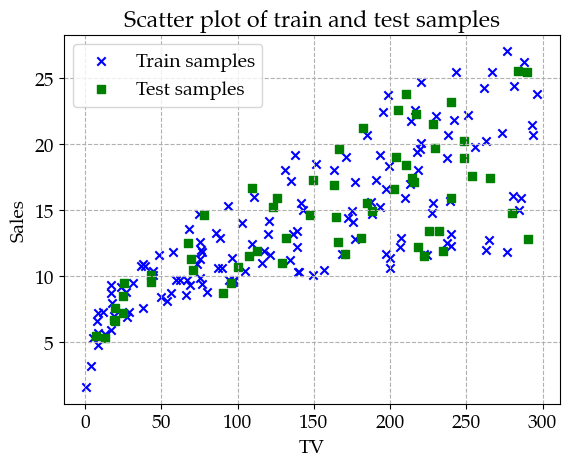

In [278]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(X_train, y_train, marker="x", color="b", label="Train samples")
ax.scatter(X_test, y_test, marker="s", color="g", label="Test samples")

ax.set_title("Scatter plot of train and test samples")
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
plt.legend()
plt.grid(ls='--')

In [279]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (140,)
y_train: (140,)
X_test: (60,)
y_test: (60,)


In [280]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Extracting coefficient 

In [282]:
# Print the intercept and coefficients
print("Intercept", beta_0)
print("Slope", beta_1)

y_train_pred = beta_0 + beta_1*X_train
y_test_pred = beta_0 + beta_1*X_test

Intercept 5.942667985609139
Slope 0.05314557915266163


#### Predicting using fitted model 

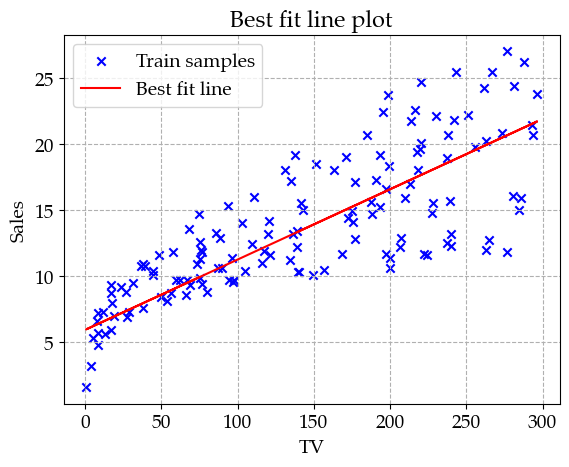

In [283]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X_train, y_train, marker="x", color="b", label="Train samples")
ax.plot(X_train, y_train_pred, color='red', label="Best fit line")
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
ax.set_title("Best fit line plot")
plt.legend()
plt.grid(ls='--')

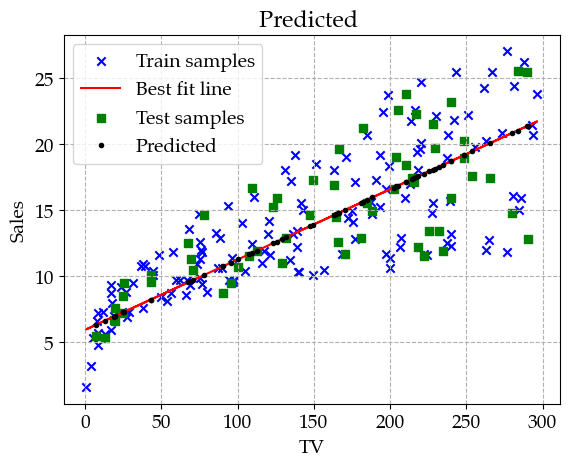

In [284]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X_train, y_train, marker="x", color="b", label="Train samples")
ax.plot(X_train, y_train_pred, color='red', label="Best fit line")

ax.scatter(X_test, y_test, marker="s", color="g", label="Test samples")
ax.plot(X_test, y_test_pred, ".", color='black', label="Predicted")

ax.set_xlabel("TV")
ax.set_ylabel("Sales")
ax.set_title("Predicted ")

plt.legend()
plt.grid(ls='--')


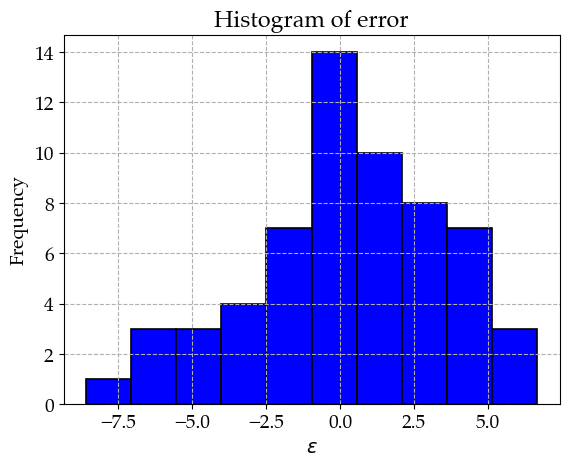

In [285]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist(y_test-y_test_pred, bins=10, color="blue", edgecolor='black', linewidth=1.2)

ax.set_xlabel("$\epsilon$")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of error")

plt.grid(ls='--')

In [286]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

In [287]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :', r_squared)

Mean_Squared_Error : 10.960422966692976
r_square_value : 0.5594100427084796


#### Visualizing the coefficients 

In [288]:
X=X_train.values.reshape(-1,1)
y=y_train.values
print(X.shape)
print(y.shape)

(140, 1)
(140,)


In [297]:
# Create grid coordinates for plotting
b = np.linspace(beta_0-2, beta_0+2, 50)
m = np.linspace(beta_1-0.02, beta_1+0.02, 50)
xx, yy = np.meshgrid(b, m, indexing='xy')
Z = np.zeros((b.size, m.size))

# Calculate Z-values (RSS) based on grid of coefficients
# actual - predicted , (y-(b+mx))
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()

# Minimized RSS
min_RSS = r'b, m for minimized RSS'
min_rss = np.sum((beta_0+beta_1*X - y.reshape(-1,1))**2)
min_rss

1505.1149800264204

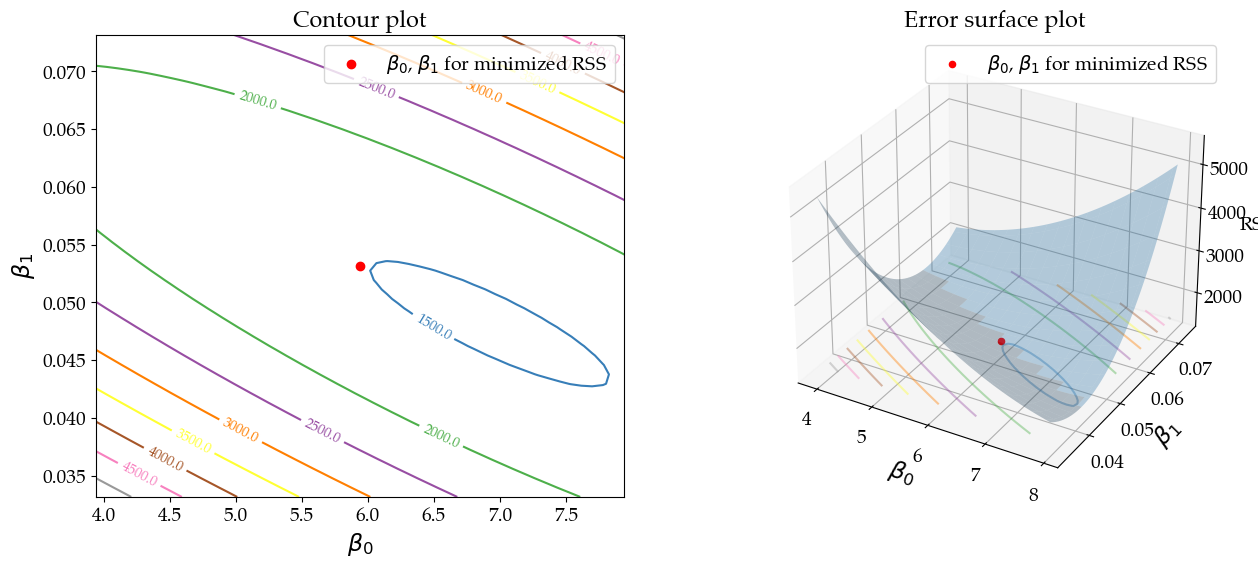

In [298]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1)
ax1.scatter(beta_0, beta_1, c='r', label=r'$\beta_0$, $\beta_1$ for minimized RSS')
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_title("Contour plot")

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1, alpha=0.4)
ax2.scatter3D(beta_0, beta_1, min_rss, c='r', label=r'$\beta_0$, $\beta_1$ for minimized RSS')
ax2.set_zlabel('RSS')
ax2.set_title("Error surface plot")

# Settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.legend()